# Polynomial Regression

It is a form of Linaer Regression technique where the relationship between the independent variable (features) and the dependent variable (target) is modeled as an **nth degree polynomial**. 

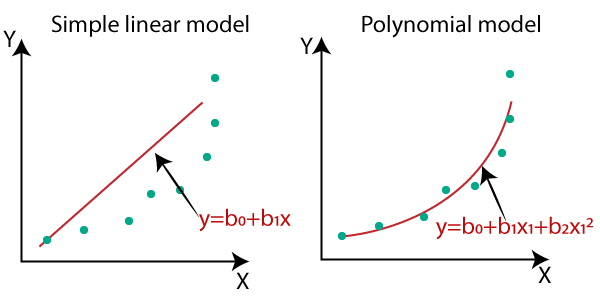

As shown above: Instead of fitting a straight line (as in simple linear regression), it involves fitting a curve to the data.


## How does a Polynomial Regression work?

When the relationship is non-linear, a polynomial regression model introduces higher-degree polynomial terms. By including higher-degree terms (quadratic, cubic, etc.), the model can capture the non-linear patterns in the data.

The polynomial regression equation for degree n is given by:

    

where,

* y is the dependent variable,
* x is the independent variable,
* n is the degree of the polynomial, and
* b0, b1, b2,..., bn are the coefficients to be determined through the training process.




## Why Polynomial Regression?

Polynomial regression is particularly useful when the relationship between the variables is non-linear, allowing for a more flexible model that can capture complex patterns in the data. 

Let's delve into the practical example to understand this concept better.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

Let's build a polynomial data that will represent this equation: **y = 0.5x^2 + 0.9x + 2**

### Generating synthetic data with a Quadratic relationship using NumPy and randomness

In [2]:
# X values randomly generated in the range [-3, 3]
X = 6 * np.random.rand(200, 1) - 3

# Creating a quadratic relationship in the data with some noise
y = 0.5 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

Let's plot our generated data.

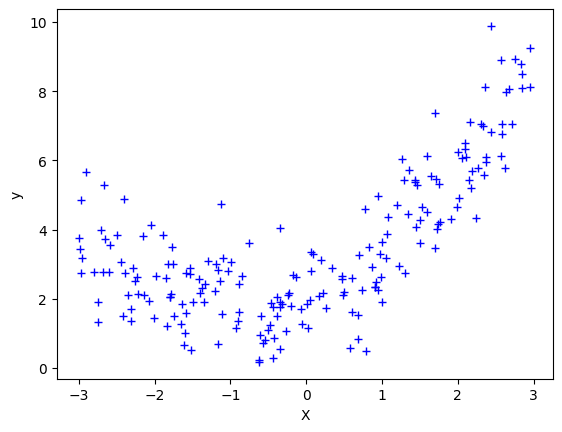

In [3]:
plt.plot(X, y,'b+')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

## Train test split

In [4]:
train_input,test_input,train_target,test_target = train_test_split(X,y,test_size=0.2,random_state=42)

## Applying Linear Regression to find best fit line

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(train_input, train_target)

LinearRegression()

In [7]:
y_pred = lr.predict(test_input)

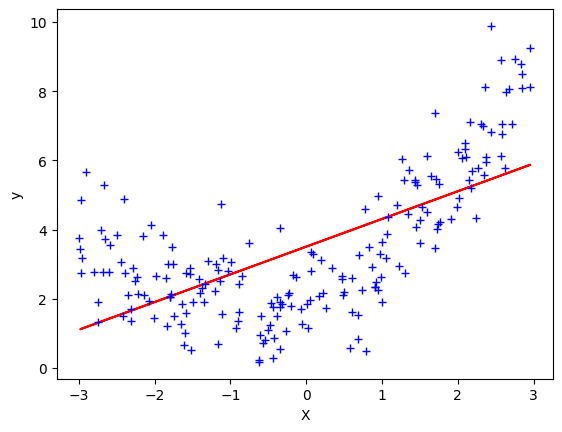

In [8]:
plt.plot(train_input,lr.predict(train_input),color='r')
plt.plot(X, y, "b+")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
r2_score(test_target,y_pred)

0.2827574432942852

Clearly, not a good model for this non-linear data.

While Simple Linear Regression models the relationship as a straight line, Polynomial Regression allows for more flexibility by fitting a polynomial equation to the data.

## Applying Polynomial Linear Regression

Fitting the Polynomial Regression model using the preprocessing `PolynomialFeatures` Method on two components X and y. 

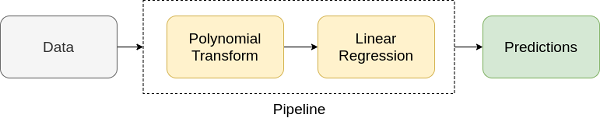

In [10]:
# degree 2
polynomial = PolynomialFeatures(degree=2,include_bias=True)

trans_train_input = polynomial.fit_transform(train_input)
trans_test_input = polynomial.transform(test_input)

## Calculating the degree of polynomial for each row from train_input column.

For example: For **degress = 2**;
    
    Polynomial Features are X^0 (X power 0), X^1 (X power 1), X^2 (X power 2) this helps to interpret the non-linear relationship in data.

In [11]:
# Printing the first element of the original training input and transformed training input arrays

print("train_input", train_input[0])
print("trans_train_input", trans_train_input[0])

# Examining these elements helps compare the original and transformed data.

train_input [-0.07253028]
trans_train_input [ 1.         -0.07253028  0.00526064]


In [12]:
lr = LinearRegression()

In [17]:
lr.fit(trans_train_input,train_target)

LinearRegression()

In [18]:
trans_y_pred = lr.predict(trans_test_input)

In [22]:
# Generating new data for prediction and transforming it using polynomial features

# Creating a new array of 200 evenly spaced values in the range [-3, 3]
X_new=np.linspace(-3, 3, 200).reshape(200, 1)

# Transforming the new data using the previously fitted polynomial features
X_new_polynomial = polynomial.transform(X_new)

# Predicting the target variable using the trained linear regression model
y_new = lr.predict(X_new_polynomial)

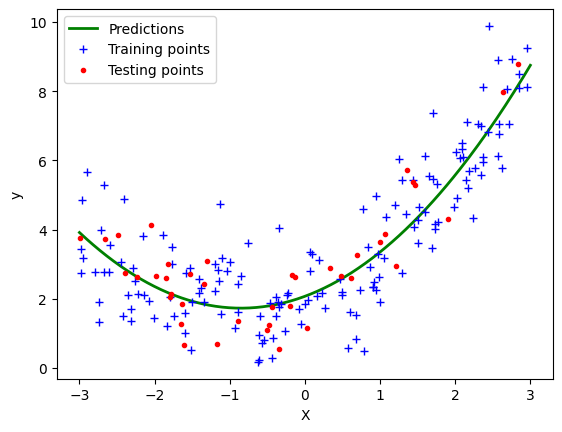

In [21]:
plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions")
plt.plot(train_input, train_target, "b+", label='Training points')
plt.plot(test_input, test_target, "r.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [26]:
print("poly_r2_score", r2_score(test_target, trans_y_pred))

poly_r2_score 0.8056375214488429


The R2 Score has increase drastically. 

Hence, we need Polynomial Linear Regression for Non-Linear Data.

In [27]:
# Polynomial coefficients and intercept
print(lr.coef_)
print(lr.intercept_)

[[0.         0.80521608 0.47317423]]
[2.07413248]


We can note that: We have approximately similar coefficients and intercept as per our equation. 

Also, it is important to note that it won't be ever exactly same due to addition of noise.

## **Let's play with degrees**

In [31]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = polynomial.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'g', label="Degree " + str(degree), linewidth=2)

    plt.plot(train_input, train_target, "b+", linewidth=3)
    plt.plot(test_input, test_target, "r.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

## Best fit Curve for : Degree 2

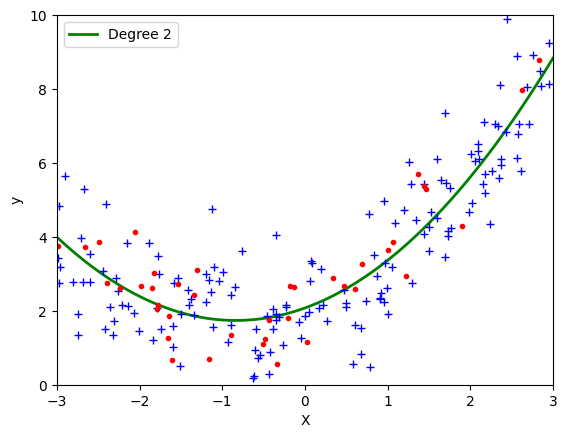

In [32]:
polynomial_regression(2)

## Best fit Curve for : Degree 3

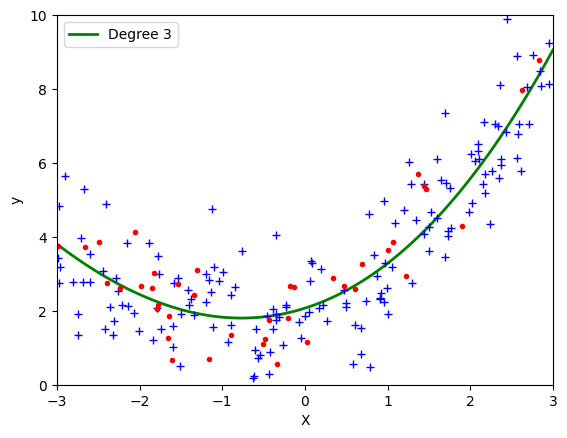

In [34]:
polynomial_regression(3)

## Best fit Curve for : Degree 5

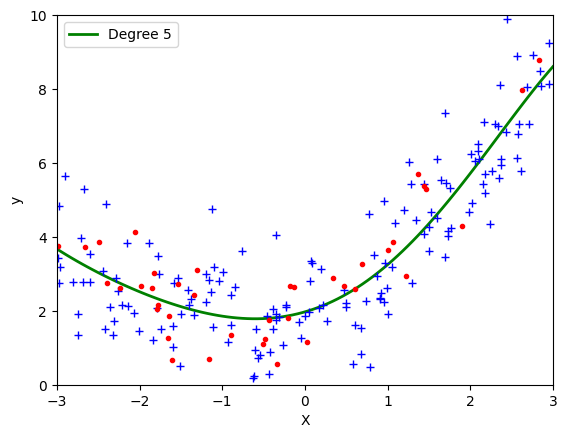

In [35]:
polynomial_regression(5)

## Best fit Curve for : Degree 12

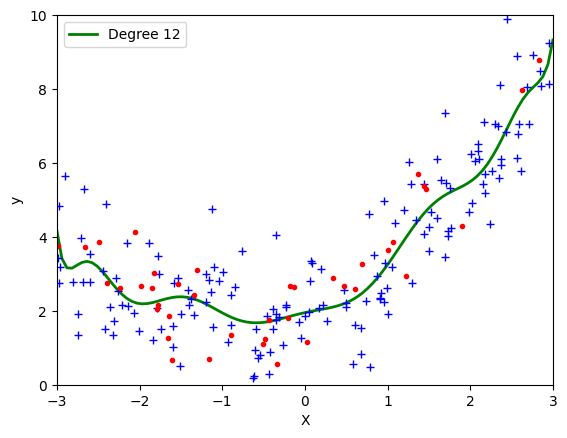

In [36]:
polynomial_regression(12)

## Best fit Curve for : Degree 23

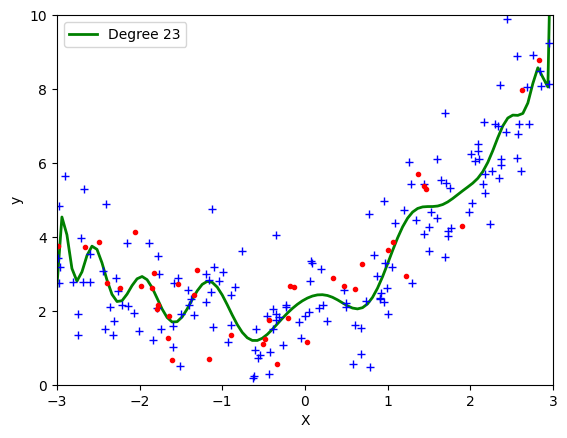

In [37]:
polynomial_regression(23)

## Best fit Curve for : Degree 40

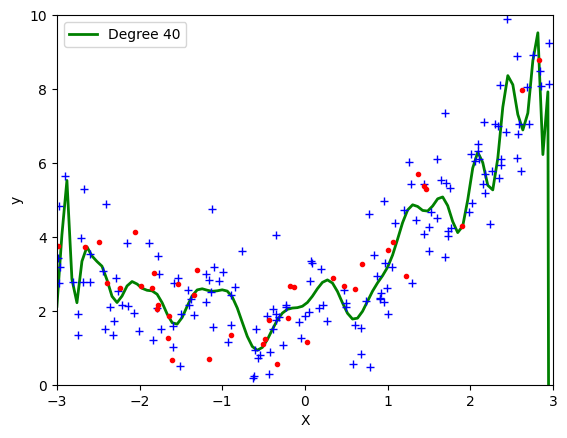

In [38]:
polynomial_regression(40)

## Conclusion:

### **Choice of the polynomial degree (n)**

The choice of the polynomial degree (n) is a crucial aspect of polynomial regression that determines the flexibility of the model.

But **higher degrees** may lead to **overfitting**. 

*Note: Regularization techniques likes **Lasso regression** and **Ridge regression** methodologies may be applied to penalize the weights of the model to regularize the effect of the overfitting problem in polynomial regression. Therefore, the degree should be chosen based on the complexity of the underlying relationship in the data.*

The polynomial regression model is trained to find the coefficients that minimize the difference between the predicted values and the actual values in the training data.

Once the model is trained, it can be used to make predictions on new, unseen data. The polynomial equation captures the non-linear patterns observed in the training data, allowing the model to generalize to non-linear relationships.

## Applying Gradient Descent 

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


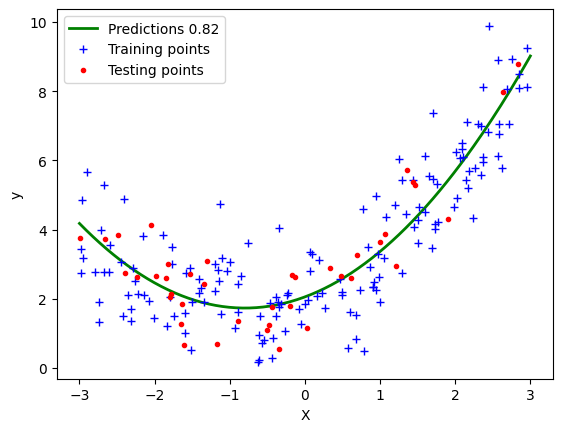

In [42]:
polynomial = PolynomialFeatures(degree=2)

trans_train_input = polynomial.fit_transform(train_input)
trans_test_input = polynomial.transform(test_input)

sgd = SGDRegressor(max_iter=100)
sgd.fit(trans_train_input, train_target)

X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = polynomial.transform(X_new)
y_new = sgd.predict(X_new_poly)

sgd_pred = sgd.predict(trans_test_input)

plt.plot(X_new, y_new, "g-", linewidth=2, label="Predictions " + str(round(r2_score(test_target,sgd_pred),2)))
plt.plot(train_input, train_target, "b+",label='Training points')
plt.plot(test_input, test_target, "r.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In summary, if we preprocess our data using `PolynomialFeatures` with optimal degree than both **Linear Regression** and **SGD Regression** are appropriate and effective for modeling non-linear relationships on the data.

Let's build a **3D Polynomial Regression** data that will represent this equation: **z = x^2 + y^2 + 0.4x + 0.4y + 0.2xy + 2**

### Generating synthetic data in 3D space with a Quadratic Relationship

In [41]:
# Randomly generating 100 points for x and y in the range [-2.8, 4.2]
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

# Creating a quadratic relationship in 3D space with some additional terms and noise
z = x**2 + y**2 + 0.4 * x + 0.4 * y + 0.2 * x * y + 2 + np.random.randn(100, 1)

# The generated data simulates a quadratic surface in 3D space with added noise.
# Each point (x, y, z) represents a coordinate in space where z is determined by the quadratic relationship.

In [42]:
import plotly.graph_objects as go
import plotly.express as px

In [43]:
# Creating a scatter plot of the generated data
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

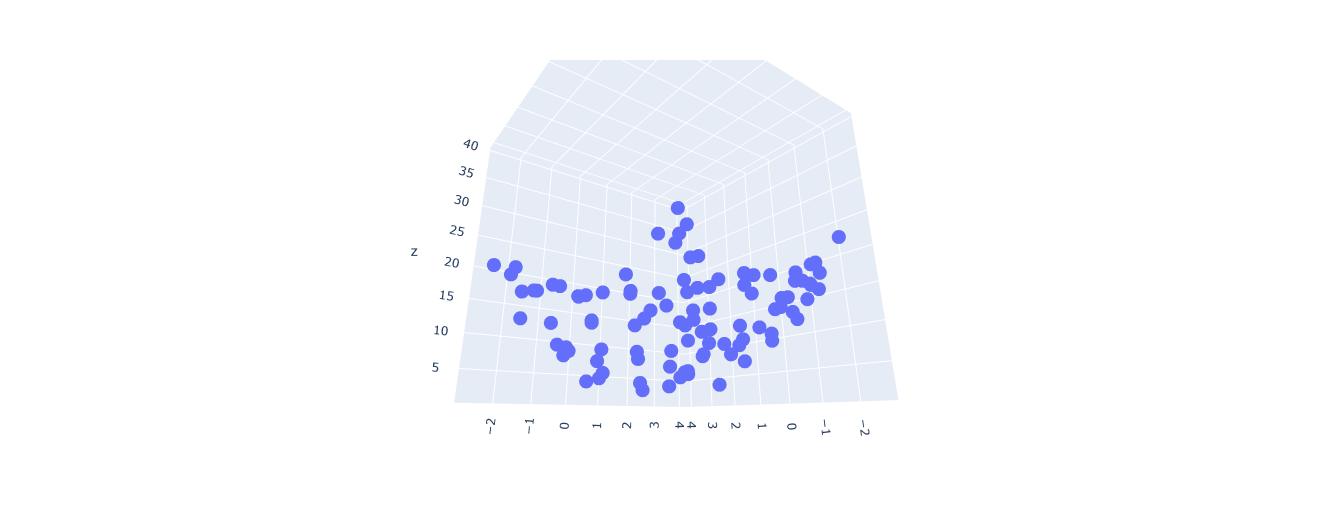

In [44]:
# Creating a Linear Regression model and fitting it to the 3D data
lr = LinearRegression()
lr.fit(np.array([x, y]).reshape(100, 2), z)

# Generating a set of input points to create a surface plot
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input, y_input)
final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T

# Predicting the output (z) values for the input points and reshaping for surface plot
z_final = lr.predict(final).reshape(10, 10)


In [45]:
# Adding the surface plot of the linear regression model to the scatter plot
fig.add_trace(go.Surface(x=x_input, y=y_input, z=z_final))
fig.update_layout(scene=dict(zaxis=dict(range=[0, 35])))
fig.show()

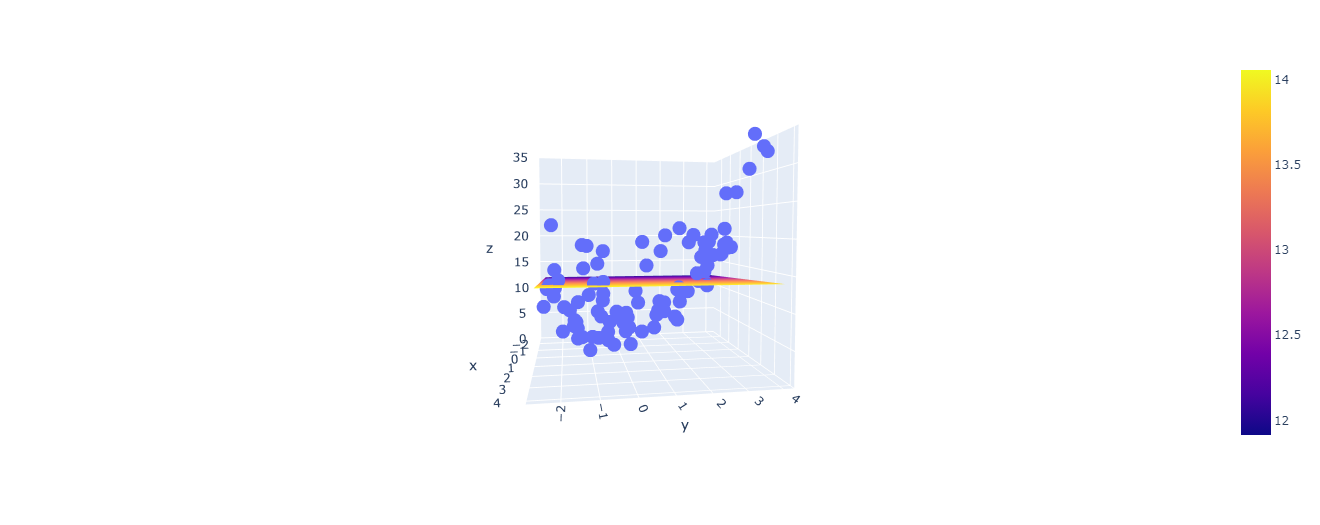

## Applying Polynomial Regression

In [50]:
# Polynomial Regression on the data
polynomial_features = PolynomialFeatures(degree=2)

# By using np.hstack((x, y)), you concatenate x and y horizontally, resulting in a 2D array with two columns, 
# which is the correct format for input features in scikit-learn's regression models.
X_multi = np.hstack((x, y))

# Transforming the data with polynomial features
X_multi_trans = polynomial_features.fit_transform(X_multi)

# Creating and fitting a Linear Regression model with polynomial features
lr_polynomial_features = LinearRegression()
lr_polynomial_features.fit(X_multi_trans, z)

# Transforming the test input points with polynomial features and predicting the output (z) values
X_test_multi = polynomial_features.transform(final)
z_final_polynomial_features = lr_polynomial_features.predict(X_test_multi).reshape(10, 10)

In [51]:
# Creating a new scatter plot and adding the surface plot of the polynomial regression model
fig_poly = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
fig_poly.add_trace(go.Surface(x=x_input, y=y_input, z=z_final_polynomial_features))
fig_poly.update_layout(scene=dict(zaxis=dict(range=[0, 35])))
fig_poly.show()

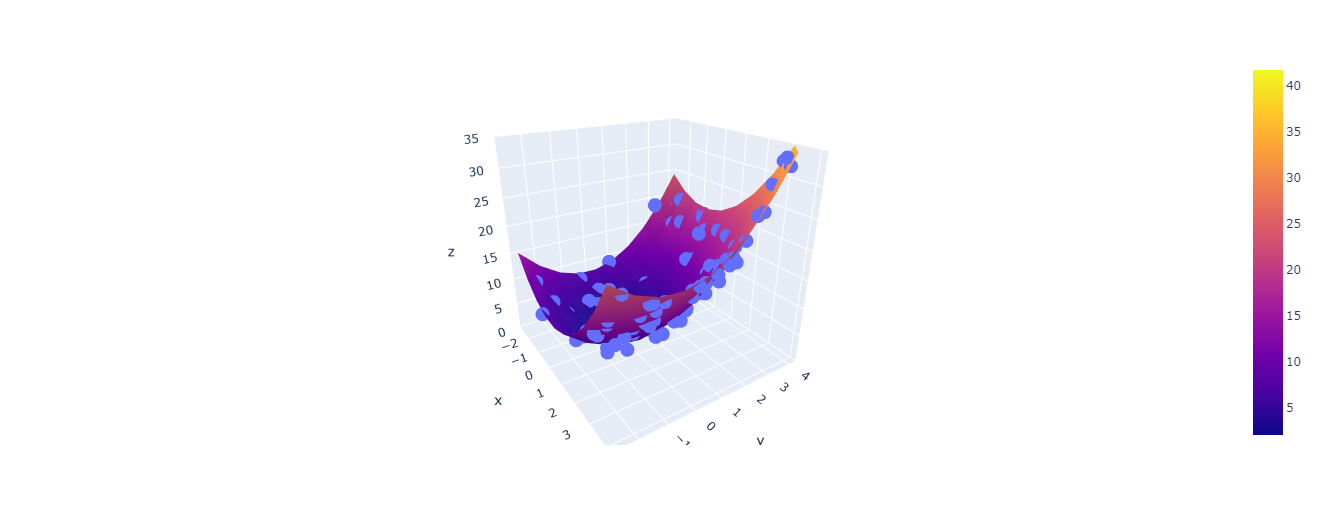

In [52]:
print("Input Features:",polynomial_features.n_features_in_)
print("Ouput Features:",polynomial_features.n_output_features_)
print("Powers\n",polynomial_features.powers_)

Input Features: 2
Ouput Features: 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


In [53]:
# Polynomial coefficients and intercept
print(lr_polynomial_features.coef_)
print(lr_polynomial_features.intercept_)

[[0.         0.50761449 0.41941826 0.99420955 0.19125634 0.98911091]]
[2.03315578]


We can note that: We have approximately similar coefficients and intercept as per our equation. 

Also, it is important to note that it won't be ever exactly same due to addition of noise.

## **Let's again play with degrees**

In [54]:
def plot_polynomial_graph(degree):
    # Randomly generating 100 points for x and y in the range [-2.8, 4.2]
    x = 7 * np.random.rand(100, 1) - 2.8
    y = 7 * np.random.rand(100, 1) - 2.8

    # Creating a quadratic relationship in 3D space with some additional terms and noise
    z = x**2 + y**2 + 0.4 * x + 0.4 * y + 0.2 * x * y + 2 + np.random.randn(100, 1)

    # Polynomial Regression on the data
    polynomial_features = PolynomialFeatures(degree=degree)

    # Concatenating x and y horizontally
    X_multi = np.hstack((x, y))

    # Transforming the data with polynomial features
    X_multi_trans = polynomial_features.fit_transform(X_multi)

    # Creating and fitting a Linear Regression model with polynomial features
    lr_polynomial_features = LinearRegression()
    lr_polynomial_features.fit(X_multi_trans, z)

    # Generating a set of input points to create a surface plot
    x_input = np.linspace(x.min(), x.max(), 10)
    y_input = np.linspace(y.min(), y.max(), 10)
    xGrid, yGrid = np.meshgrid(x_input, y_input)
    final = np.vstack((xGrid.ravel().reshape(1, 100), yGrid.ravel().reshape(1, 100))).T

    # Transforming the test input points with polynomial features and predicting the output (z) values
    X_test_multi = polynomial_features.transform(final)
    z_final_polynomial_features = lr_polynomial_features.predict(X_test_multi).reshape(10, 10)

    # Creating a scatter plot and adding the surface plot of the polynomial regression model
    fig_poly = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
    fig_poly.add_trace(go.Surface(x=x_input, y=y_input, z=z_final_polynomial_features))
    fig_poly.update_layout(scene=dict(zaxis=dict(range=[0, 35])))
    fig_poly.show()


In [57]:
plot_polynomial_graph(10)

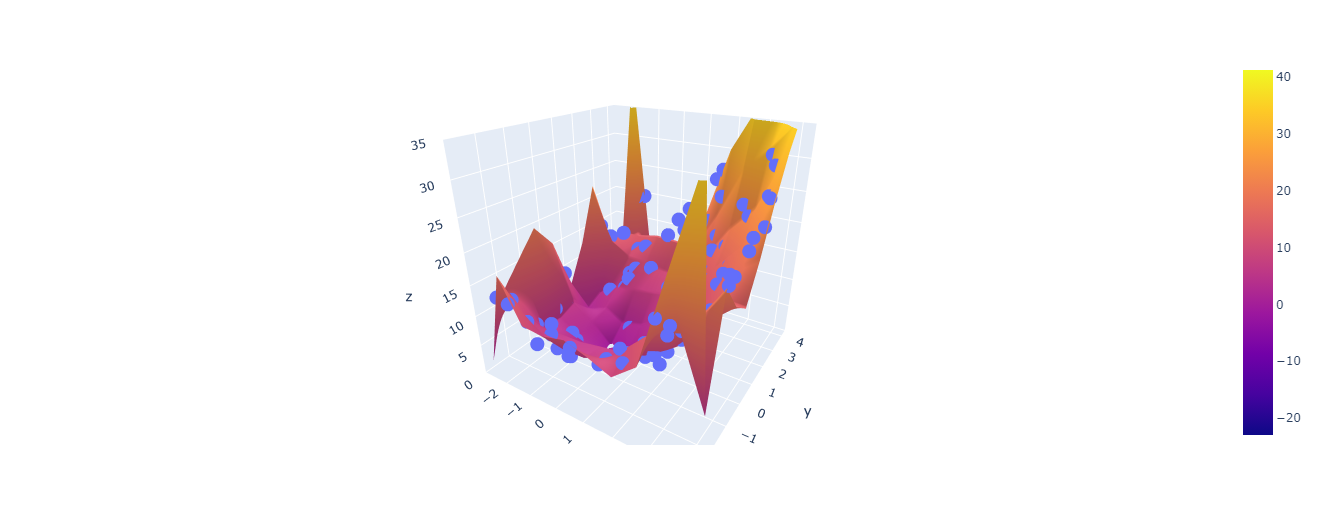

In [59]:
plot_polynomial_graph(15)

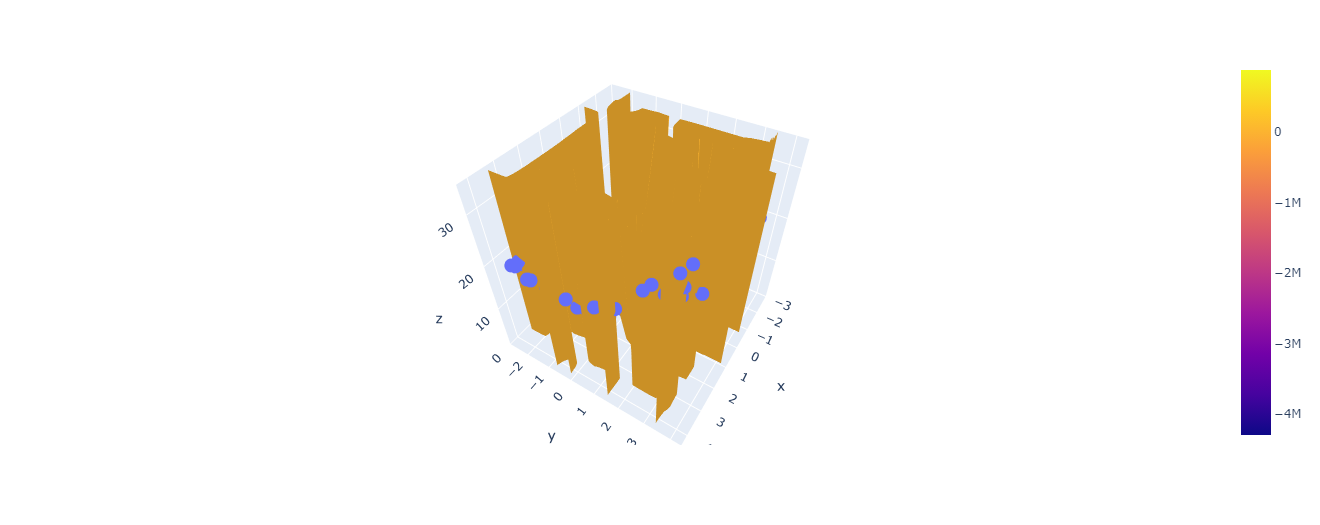

As mentioned above, the **choice of the polynomial degree (n) is a crucial aspect of polynomial regression that determines the flexibility of the model.**

And **higher degrees** may lead to **overfitting**, as you can seen with the help of these plots.

Now, let's understand some important topics.

 ### **Ques. Why Is Polynomial Regression also known as Polynomial Linear Regression?**

-- In polynomial regression, we aim to find the relationship between coefficients (including, intercept) and the target (y) because we already have X values. So, the equation is polynomial, but the degree of coefficients are linear i.e. 1. Hence, Polynomial Regression is also known as Polynomial Linear Regression.

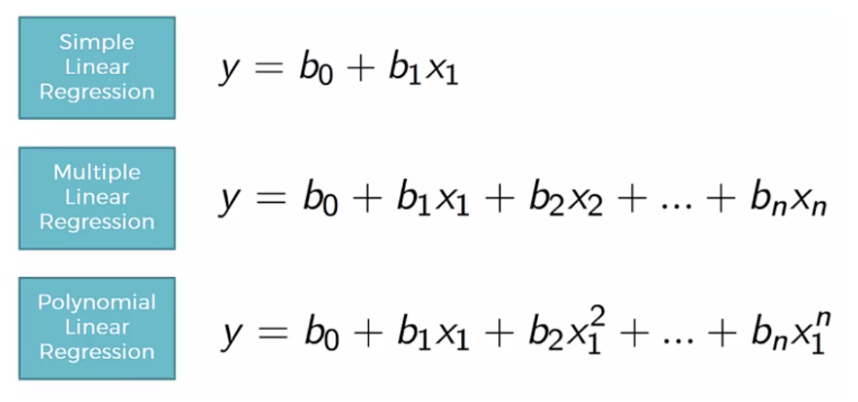
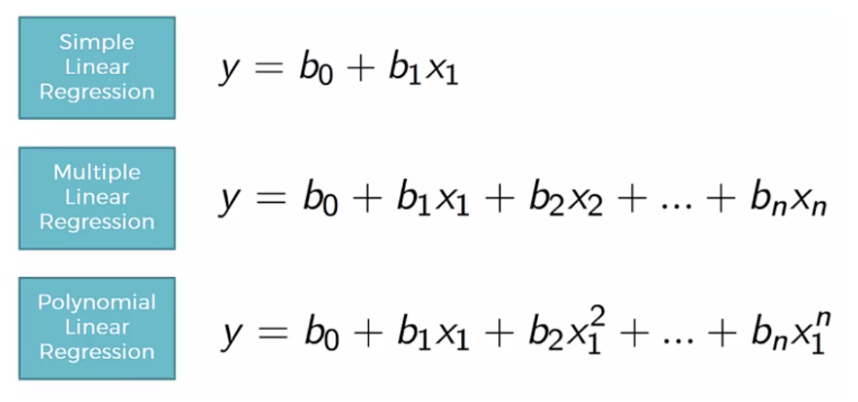

## Bias - Variance Tradeoff

It refers to the balance between two types of errors, namely bias and variance, when developing predictive models. 

Here's a concise explanation:

**Bias:** It measures how far off the predictions of a model are from the true values. It indicates the model's tendency to consistently under- or overestimate the actual outcomes.

* **Low Bias**: A model with low bias is flexible and can closely fit the training data.
* **High Bias**: A model with high bias may oversimplify the underlying patterns, leading to systematic errors.

**Variance:** It measures the amount by which the performance of a predictive model alters when it is trained on various subsets of the training data. Variance is the model’s variability by sensitivity to small fluctuations in another subset of the training dataset. 

* **Low Variance**: A model with low variance generalizes well to new, unseen data.
* **High Variance**: A model with high variance may capture noise in the training data and fail to generalize to new data.

**Tradeoff:** A trade-off exists between an ML model’s ability to minimise bias and variance. It is known as the best solution for choosing a value of regularisation constant. 

Achieving a good balance is crucial for developing models that perform well on both the training data and new, unseen data helps avoid underfitting or overfitting the dataset.

## Overfitting and Underfitting:

-- **Underfitting (High Bias, Low Variance)**: The model is too simple and fails to capture the underlying patterns, performing poorly on both training and new data.

-- **Overfitting (High Variance, Low Bias)**: The model fits the training data too closely, capturing noise and performing poorly on new data.
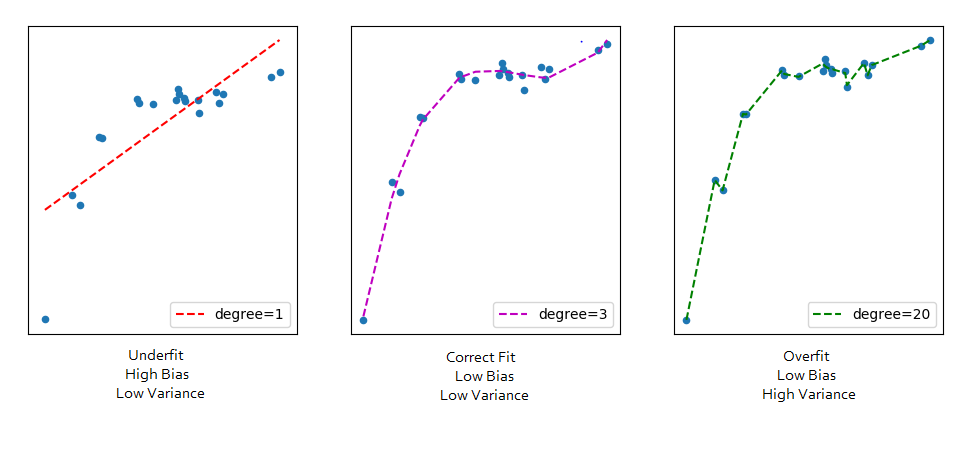

## Optimal Tradeoff:

The goal is to find the optimal tradeoff that minimizes both bias and variance, leading to a model that generalizes well to new, unseen data.

In practice, techniques like **cross-validation, regularization, and ensemble methods(bagging and boosting)** are employed to create an appropriate balance between bias and variance, ultimately improving the model's predictive performance on diverse datasets.



## Advantages of using Polynomial Regression

* **Captures Non-linear Relationships**: Polynomial regression can model complex, non-linear relationships between independent and dependent variables. This is especially useful when the relationship is not adequately captured by a simple linear model.

* **Flexible**: It allows for greater flexibility in fits a wide range of curvatures to the data, accommodating patterns that might be missed by simpler models.

* **Useful for Small Datasets**: Polynomial regression can be effective when dealing with smaller datasets where the underlying patterns might not be apparent in a linear model.

## Disadvantages of using Polynomial Regression

* **Overfitting**: One of the main challenges is the risk of overfitting, especially as the degree of the polynomial increases. Higher-degree polynomials may fit the training data perfectly but perform poorly on new, unseen data.

* **Increased Complexity**: Higher-degree polynomials introduce more parameters to the model, making it more complex. This complexity can lead to difficulties in interpretation and increased computation requirements.

* **Sensitivity to Outliers**: Polynomial regression can be sensitive to outliers, as the model tries to fit the curve through all data points. Outliers can disproportionately influence the fit.

* **Limited Extrapolation**: Extrapolating beyond the range of the training data may lead to unreliable predictions. The model might produce inaccurate results when applied to values outside the range of the observed data.

* **Selection of the Polynomial Degree**: Choosing the right degree for the polynomial can be challenging. Too low a degree may not capture the complexity of the underlying relationship, while too high a degree may result in overfitting.

## Application of Polynomial Regression

Polynomial regression is commonly used because many real-world datasets have non-linear patterns. By fitting a curvilinear regression line, it provides better accuracy than standard linear regression for capturing the complexity in diverse data.

> Stay tuned for Ridge and Lasso Regression and Don't forget to **Star** this Github Repository for more such contents and consider **sharing** with others.